# **Getaround - Pricing Dataset EDA**
---
Author :
Christophe NORET

In [86]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis


## Loading dataset


In [87]:
# Load the dataset
df = pd.read_csv("../data/get_around_pricing_project.csv")

In [88]:
# Display the first few rows for a quick preview
print("Preview of the first few rows:")
df.head()

Preview of the first few rows:


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [89]:
# Drop the unnecessary column 'Unnamed: 0'
df.drop(columns=["Unnamed: 0"], inplace=True)

## Dataset characteristics


In [90]:
# Display information about the columns and data types
print("\nInformation on columns and types:")
print(df.info())


Information on columns and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4

In [91]:
# Descriptive statistics
print("\nDescriptive statistics for numeric columns:")
display(df.describe())


Descriptive statistics for numeric columns:


,mileage,engine_power,rental_price_per_day
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,121.214536
std,6.019674e+04,38.99336,33.568268
min,-6.400000e+01,0.00000,10.000000
25%,1.029135e+05,100.00000,104.000000
50%,1.410800e+05,120.00000,119.000000
75%,1.751955e+05,135.00000,136.000000
max,1.000376e+06,423.00000,422.000000


In [92]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [93]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print("\nMissing data per column:")
print(missing_data)


Missing data per column:
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64


## Distribution Analysis


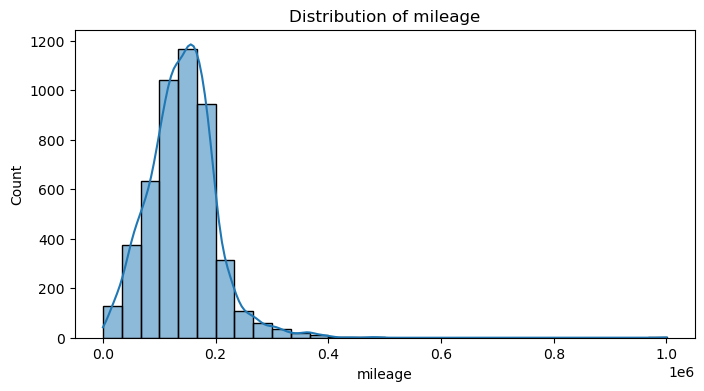

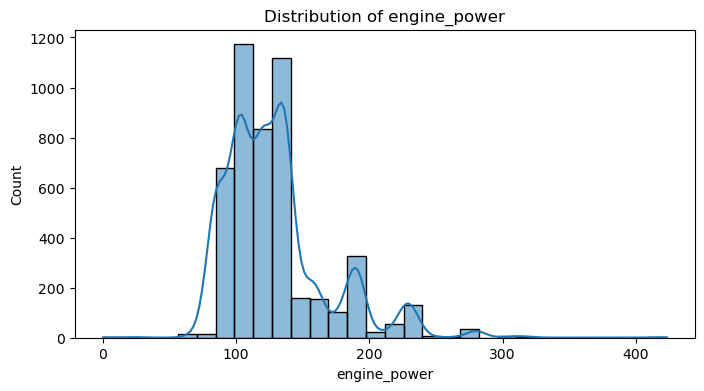

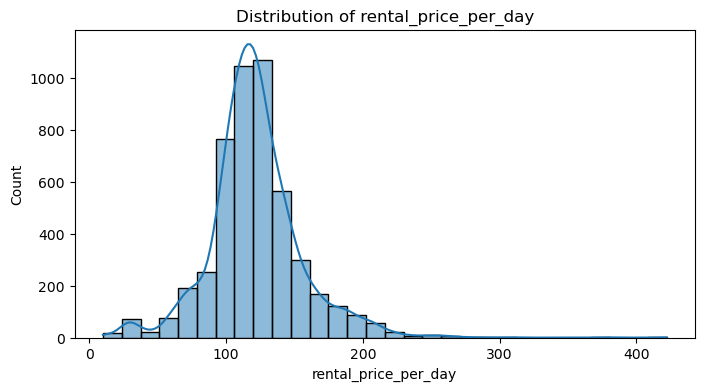

In [94]:
# Visualize the distribution of numerical variables
numeric_columns_pricing = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_columns_pricing:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

## Outliers


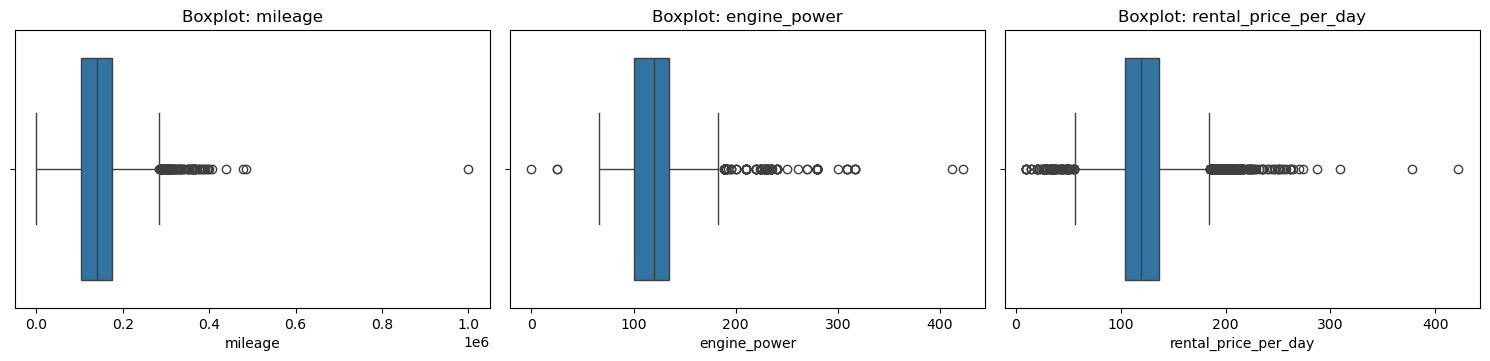

In [95]:
numerical_columns_df = df.select_dtypes(include=['float64', 'int64']).columns

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))

# Create boxplots for each numerical column to visualize outliers
for i, column in enumerate(numerical_columns_df, 1):
    plt.subplot(3, 3, i)
    
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot: {column}')

plt.tight_layout()
plt.show()

## Data visualisation

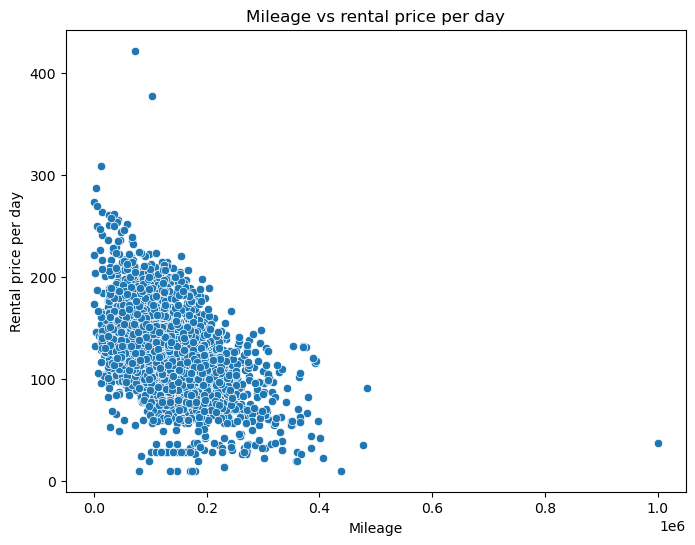

In [96]:
# Visualize the relationship between mileage and rental price per day
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='rental_price_per_day', data=df)
plt.title('Mileage vs rental price per day')
plt.xlabel('Mileage')
plt.ylabel('Rental price per day')
plt.show()

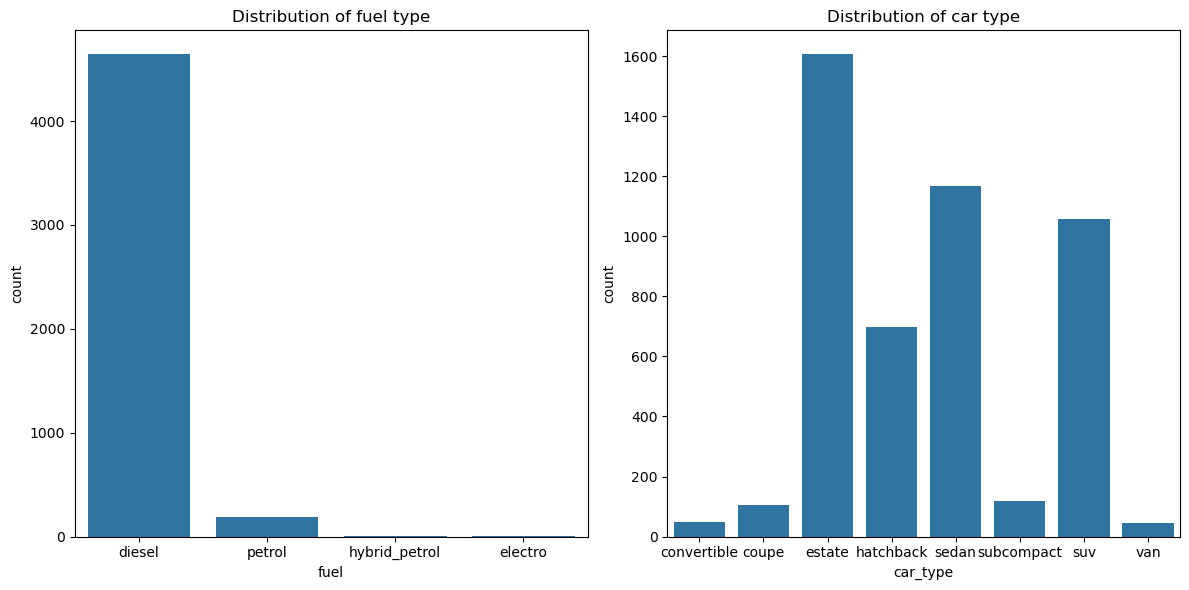

In [97]:
# Visualize the distribution of fuel type and car type
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='fuel', data=df)
plt.title('Distribution of fuel type')

plt.subplot(1, 2, 2)
sns.countplot(x='car_type', data=df)
plt.title('Distribution of car type')

plt.tight_layout()
plt.show()

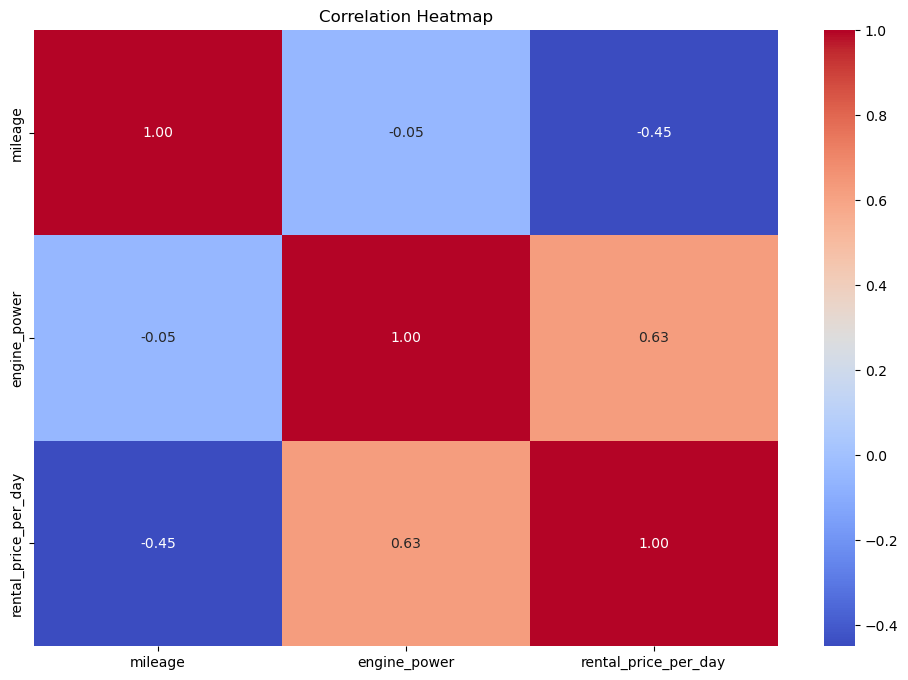

In [98]:
# Visualize the correlation between numerical variables
correlation_matrix = df[numerical_columns_df].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()